# This is the (minor) exploratory data analysis and test data analysis using Linear Regression
### Contents include:
    - Imported Libraries/Datasets and Declared Functions
    - Final Cleaning of Initial DataFrames (as there are two, one being made of multiple)
    - Basic Visualizations to determine proper type of analysis
    - Creating a final Dataframe based on the information needed
    - Conducting brief descriptive statistics of the final dataframe
    - Conducting a Linear Regression on the final dataframe
    - Concluding Findings

    -H0 = There is no significant correlation of change for the number of california legislature bills related to law enforcement
    and the number of reporting police-related shootings in CA.

    -H1 = There is a significant correlation of change for the number of california legislature bills related to law enforcement
    and the number of reporting police-related shootings in CA.
******************
*******************

## Importing Libraries needed and Creating Functions needed
    - Will need numpy, seaborn, matplotlib, pandas, scikit-learn (linear regression and train_test_split)
    - Will need the consolidated datasets to perform final merging
    - Will need a function to do linear regression analysis

In [344]:
#Importing numpy, seaborn, matplotlib, pandas
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt
#Importing sklearn modules that are needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [345]:
#Importing the bills and shootings tables which should have only the California results 2016-2021
bills_table = pd.read_csv('Bills_Dataframe_2009_2021.csv')
shootings_table = pd.read_csv('shootings.csv')

In [346]:
#Checking bills_table
shootings_table.head()

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,date_homogenized
0,0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,20150102
1,1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,20150102
2,2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,20150103
3,3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,20150104
4,4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,20150104


In [347]:
#Creating a Linear Regression function with simple "leave one out' train test split
def AutoLinearRegression(X, y):
    """
    Info: Creates Linear Regression and Plot associated with two functions
    In: Dataframe column sets of int or float values
    Out: Float and Scatterplot
    """

    #Splitting the data into test and train
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
    #Reshaping the training data and testing data
    X_train.shape
    X_test.shape
    #Creating LinearRegression model
    model = LinearRegression()
    print(model) #Checking model
    #Fitting the models (test and train)
    model.fit(X_train, y_train)
    #Finding coefficient
    model.coef_
    #Finding intercept
    model.intercept_

    #R^2 = closer to 1.0 is good
    y_model = model.predict(X_train) # get the MPG valuyes from the equation we have above
    #Finally plotting to see the results
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.plot(X_train, y_model)

    print('Model R^2 Fit Score = ' + str(model.score(X_train,y_train)))
    #Prints the model score to determine if there is a fit

******************
*******************

## Final Cleaning of Initial Dataframes
    - Will need to create a month counter for data to be properly visualized
        -Months instead of dates are used due to previous issues fitting all the data within the model
    - Will need to remove years not shared by both datasets
    - Will need a function to do linear regression analysis and possibly remove outliers

In [348]:
#Stripping unneeded integers from the dates (we only need the year)
shootings_table['date_homogenized'] = shootings_table['date_homogenized'].astype(str)

templist = []
for row in shootings_table["date_homogenized"]:
    templist.append(row[0:4:1])

index = 0
#Converting years to 2-years
for i in templist:
    if int(i) == 2015:
        templist[index] = '2015'
    elif int(i) == 2016:
        templist[index] = '2016'
    elif int(i) == 2017:
        templist[index] = '2017'
    elif int(i) == 2018:
        templist[index] = '2018'
    elif int(i) == 2019:
        templist[index] = '2019'
    elif int(i) == 2020:
        templist[index] = '2020'
    elif int(i) == 2021:
        templist[index] = '2021'

    index += 1
#Creating new column
shootings_table['year'] = templist

In [349]:
#Checking the table
shootings_table.head()

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,date_homogenized,year
0,0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,20150102,2015
1,1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,20150102,2015
2,2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,20150103,2015
3,3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,20150104,2015
4,4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,20150104,2015


In [350]:
bills_table['status_date'] = bills_table['status_date'].astype(str)

templist = []
for row in bills_table["status_date"]:
    templist.append(row[0:4:1])

index = 0
#Converting years to 2-years
for i in templist:
    if int(i) == 2008:
        templist[index] = '2008'
    elif int(i) == 2009:
        templist[index] = '2009'
    elif int(i) == 2010:
        templist[index] = '2010'
    elif int(i) == 2011:
        templist[index] = '2011'
    elif int(i) == 2012:
        templist[index] = '2012'
    elif int(i) == 2013:
        templist[index] = '2013'
    elif int(i) == 2014:
        templist[index] = '2014'
    elif int(i) == 2015:
        templist[index] = '2015'
    elif int(i) == 2016:
        templist[index] = '2016'
    elif int(i) == 2017:
        templist[index] = '2017'
    elif int(i) == 2018:
        templist[index] = '2018'
    elif int(i) == 2019:
        templist[index] = '2019'
    elif int(i) == 2020:
        templist[index] = '2020'
    elif int(i) == 2021:
        templist[index] = '2021'

    index += 1
#Creating new column
bills_table['year'] = templist

In [351]:
#Checking bills table
bills_table.head()

,Unnamed: 0,bill_id,session_id,bill_number,status,status_desc,status_date,title,description,committee_id,committee,last_action_date,last_action,url,state_link,year
0,0,61630,30,ABX32,2,Engrossed,20090112,VLF state parks fee: fuel taxes: emergency ser...,An act to add Section 8587.3 to the Government...,0,NaN,20091026,Died Concurrence pending.,https://legiscan.com/CA/bill/ABX32/2009,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...,2009
1,1,59922,30,AB54,1,Introduced,20081204,State government: California Emergency Managem...,An act relating to the California Emergency Ma...,0,NaN,20100202,From committee: Filed with the Chief Clerk pur...,https://legiscan.com/CA/bill/AB54/2009,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...,2008
2,2,59931,30,AB63,4,Passed,20090806,Service contracts: retailers.,An act to add Section 1794.45 to the Civil Cod...,0,NaN,20090806,"Chaptered by Secretary of State - Chapter 74, ...",https://legiscan.com/CA/bill/AB63/2009,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...,2009
3,3,61766,30,ABX76,1,Introduced,20091029,Water diversion and use: reporting.,"An act to amend Sections 5100, 5101, 5103, and...",0,NaN,20091104,From committee without further action.,https://legiscan.com/CA/bill/ABX76/2009,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...,2009
4,4,59959,30,AB91,4,Passed,20091011,Vehicles: driving under the influence (DUI): i...,"An act to amend Sections 13386 and 23576 of, a...",0,NaN,20091011,"Chaptered by Secretary of State - Chapter 217,...",https://legiscan.com/CA/bill/AB91/2009,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...,2009


### Graphing Test 1

Text(0.5, 1.0, 'Frequency of Introduced Law Enforcement-related Bills and Shootings in California')

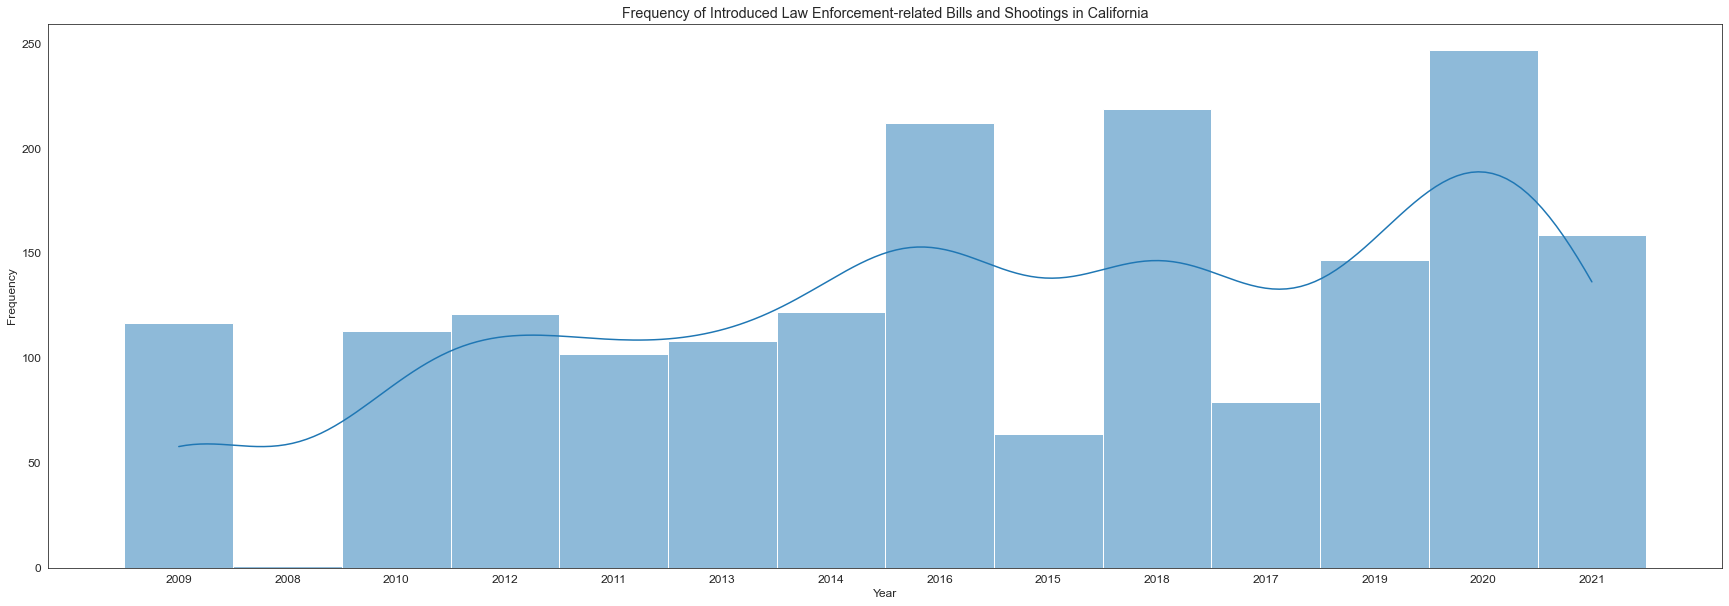

In [352]:
fig = plt.figure(figsize=(30,10))
X = np.array(bills_table['year']).flatten()
X2 = np.array(shootings_table['date_homogenized']).flatten()

sns.histplot(x = X, bins = 6, kde = True)
plt.xlabel('Year')
#plt.xticks()
plt.ylabel('Frequency')
plt.title('Frequency of Introduced Law Enforcement-related Bills and Shootings in California')

#plt.fit()

In [353]:
#Will need to remove dates not within 2015-2021
remove_years = ['2008', '2009', '2010', '2011', '2012', '2013', '2014']
for year in remove_years:
    bills_table = bills_table[~bills_table['year'].isin([year])] #Removing marked bills (non-relevant)

bills_table = bills_table.reset_index(drop=True)

bills_table.head() #Great, now I can make the final visualizations

,Unnamed: 0,bill_id,session_id,bill_number,status,status_desc,status_date,title,description,committee_id,committee,last_action_date,last_action,url,state_link,year
0,684,661052,1120,AB4,6,Failed,20160201,Vehicle weight fees: transportation bond debt ...,An act to add and repeal Section 9400.5 of the...,0,NaN,20160201,From committee: Filed with the Chief Clerk pur...,https://legiscan.com/CA/bill/AB4/2015,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...,2016
1,685,661003,1120,AB8,4,Passed,20150928,Emergency services: hit-and-run incidents.,An act to add and repeal Section 8594.15 to th...,0,NaN,20150928,"Chaptered by Secretary of State - Chapter 326,...",https://legiscan.com/CA/bill/AB8/2015,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...,2015
2,686,661059,1120,AB22,6,Failed,20161130,Office of Emergency Services: oil-by-rail spil...,An act to add Section 8574.9 to the Government...,0,NaN,20161130,From Senate committee without further action.,https://legiscan.com/CA/bill/AB22/2015,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...,2016
3,687,660988,1120,AB49,6,Failed,20160201,Livestock drugs: antibiotics.,An act relating to livestock drugs.,0,NaN,20160201,Died at Desk.,https://legiscan.com/CA/bill/AB49/2015,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...,2016
4,688,663596,1120,AB64,6,Failed,20160201,State employees: reinstatement after military ...,An act to amend Section 19780 of the Governmen...,0,NaN,20160201,From committee: Filed with the Chief Clerk pur...,https://legiscan.com/CA/bill/AB64/2015,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...,2016


### Graphing Test 2

Text(0.5, 1.0, 'Frequency of Introduced Law Enforcement-related Bills and Shootings in California')

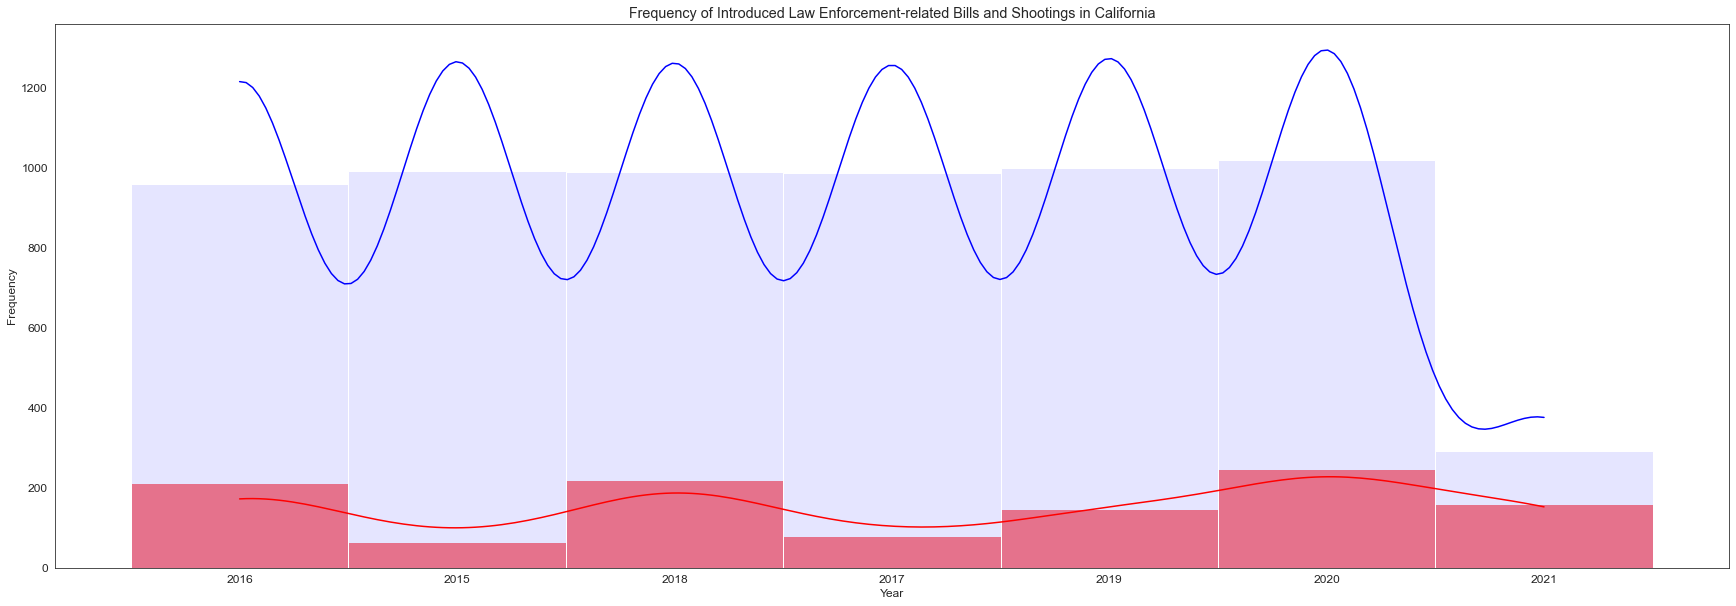

In [354]:
fig = plt.figure(figsize=(30,10))
X = np.array(bills_table['year']).flatten()
X2 = np.array(shootings_table['year']).flatten()

sns.histplot(x = X, kde = True, color='red')
sns.histplot(x = X2, kde = True, color='blue', alpha = 0.1)
plt.xlabel('Year')
#plt.xticks()
plt.ylabel('Frequency')
plt.title('Frequency of Introduced Law Enforcement-related Bills and Shootings in California')

#Seems to work fine, but we'll need more data to see a clear pattern. Going to repeat the year process but for months


In [355]:
templist = []
for row in shootings_table["date_homogenized"]:
   templist.append(row[0:6:1])
shootings_table["Year_Month"] = templist


templist = []
for row in bills_table["status_date"]:
   templist.append(row[0:6:1])
bills_table["Year_Month"] = templist

### Graphing Test 3 (Final)
- This time with months included


In [356]:
#checking unique counts
shootings_table['Year_Month'].nunique()
#Shootings = 76 unique
#Bills = 58 unique
#Used this to figure out the proper xtick amount

76

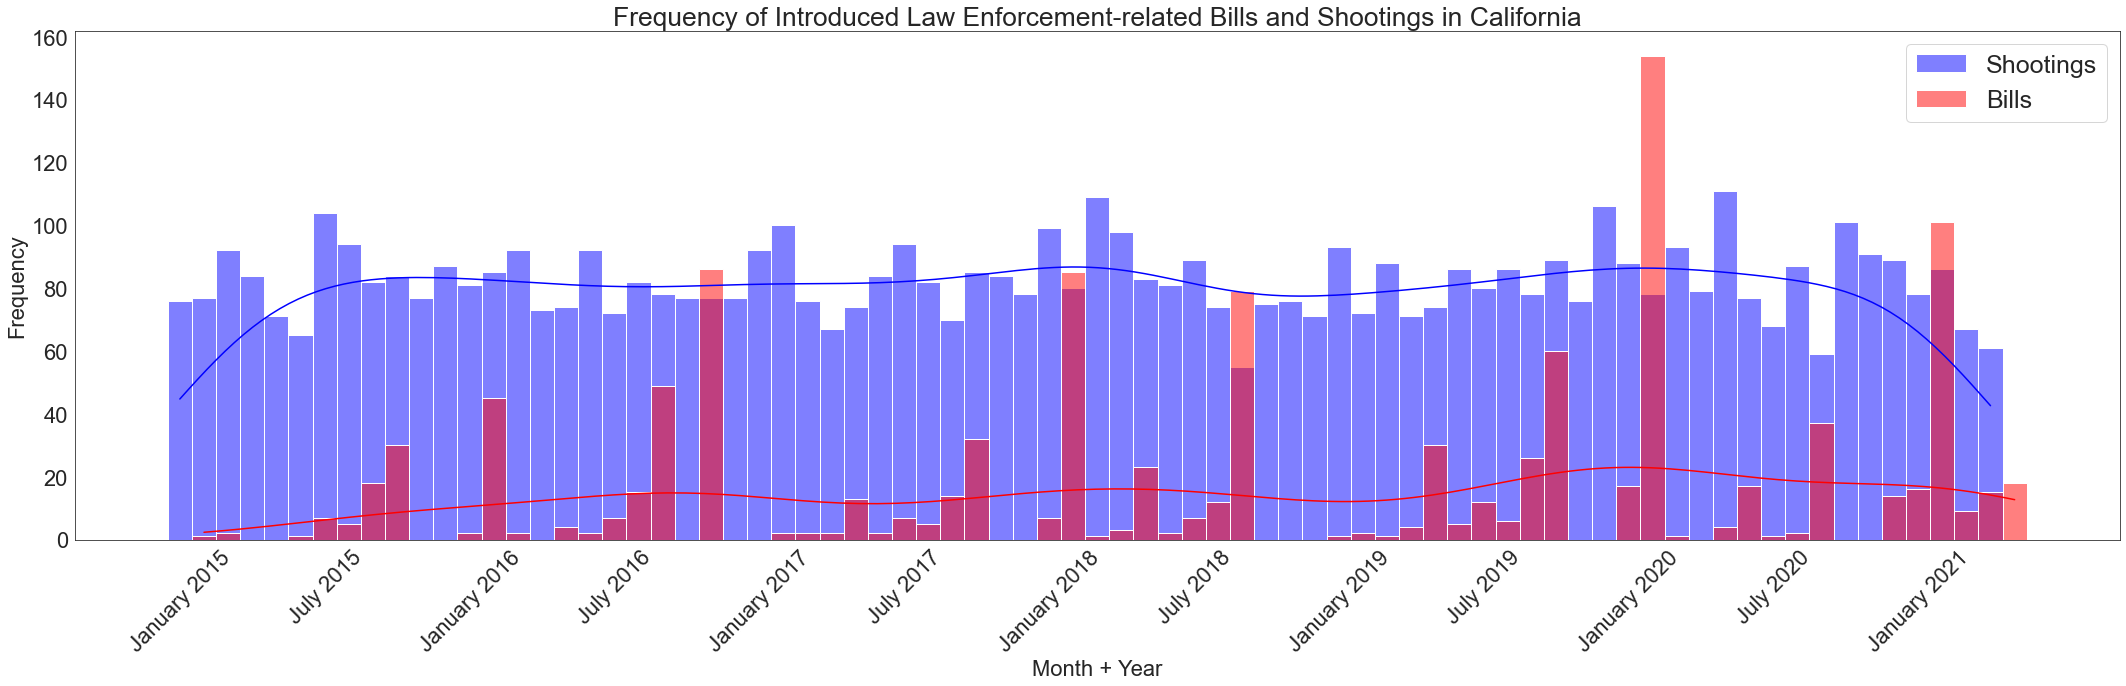

In [357]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(30,10))
X = np.array(bills_table['Year_Month']).flatten()
X2 = np.array(shootings_table['Year_Month']).flatten()

sns.histplot(x = X2, kde = True, color='blue', alpha = 0.5, label = 'Shootings')
sns.histplot(x = X, kde = True, color='red', alpha = 0.5, label = 'Bills')

plt.xlabel('Month + Year')
plt.ylabel('Frequency')
plt.title('Frequency of Introduced Law Enforcement-related Bills and Shootings in California')

#labels = ['January 2015', 'January 2016', 'January 2017', 'January 2018', 'January 2019', 'January 2020', 'January 2021']
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 76, step=6), ['January 2015', 'July 2015', 'January 2016', 'July 2016', 'January 2017', 'July 2017', 'January 2018', 'July 2018', 'January 2019', 'July 2019', 'January 2020', 'July 2020', 'January 2021'])
plt.setp(labels, rotation=45)
plt.legend(loc="upper right", prop={'size': 25})

plt.tight_layout()
plt.show()
#fig.savefig('Frequency_of_Introduced_Law_Enforcement-related_Bills_and_Shootings_in_California')
#DONE!

******************
*******************

## Consolidation of Counts for both Bills and Shootings Under One Dataframe
    - Create final dataframe to check frequency of shootings and bills under a single date

In [358]:
#Sorting values in order to ensure proper ordering (this will need to be redone at the end)
bills_table.sort_values('status_date', inplace=True)
shootings_table.sort_values('date_homogenized', inplace=True)

In [359]:
#Creating temporary series of both all dates and only unique dates to assist in parsing and counting
billscount = bills_table['status_date']
billscount_unique = billscount.unique()
shootingscount = shootings_table['date_homogenized']
shootingscount_unique = shootingscount.unique()

#Creating temporary counting lists
shootingsdatecount = []
billsdatecount = []
#Validating dates with unique date series, then storing the sum of each date
for uniquedate in billscount_unique:
    billsdatecount.append((billscount==uniquedate).sum())
#Doing the same for the other series
for uniquedate in shootingscount_unique:
    shootingsdatecount.append((shootingscount==uniquedate).sum())
#Creating combined dataframe to store count and dates for shootings
Combined_Counts = pd.DataFrame(data = shootingscount_unique, columns=['date'])
Combined_Counts['total_shootings'] = shootingsdatecount
#Doing the same for bills
Pre_Bills = pd.DataFrame(data = billscount_unique, columns=['date'])
Pre_Bills['total_bills'] = billsdatecount

#Merging both dataframes to ensure consistent and ordered counts for each date
Combined_Counts = Combined_Counts.merge(Pre_Bills, on='date')

Combined_Counts.sort_values('date', inplace=True) #Resorting just in case
#Checking first five of the new dataset
Combined_Counts.head()

,date,total_shootings,total_bills
0,20150227,1,1
1,20150323,1,1
2,20150324,3,1
3,20150616,2,1
4,20150702,4,1


******************
*******************

## Conducting Brief Statistical Analysis Output of The Final Counts Dataframe
    - Simply checking the mean, max, min, etc and datatypes to ensure linear regression will not be broken
    - Also checking visualization of scatterplot to determine if outlier removal is needed

In [360]:
#Checking descriptive statistics
Combined_Counts.describe()

,total_shootings,total_bills
count,272.000000,272.000000
mean,2.808824,3.705882
std,1.588774,8.110508
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,3.000000
max,9.000000,86.000000


In [361]:
#Checking info on dataframe
Combined_Counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             272 non-null    object
 1   total_shootings  272 non-null    int64 
 2   total_bills      272 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.5+ KB


<AxesSubplot:>

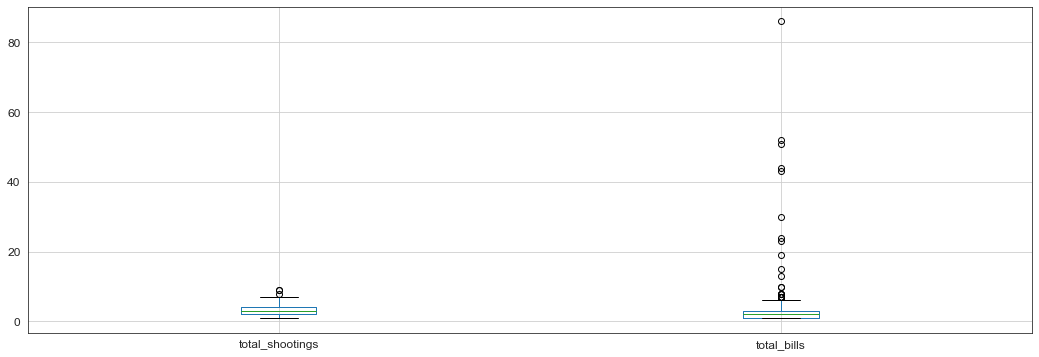

In [362]:
# Check and take care of outliers
plt.rcParams.update({'font.size': 12}) #Resizing font as this visualization will not be exported to the powerpoint
fig = plt.figure(figsize=(18,6)) #Creating figure size
ax = fig.gca() #Setting axes
Combined_Counts.boxplot(column=['total_shootings', 'total_bills'], ax=ax) #Creating boxplots

#Seems bills has a lot of outliers. Please check conclusion to see explanation as to why outlier removal was not carried out

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_shootings', ylabel='total_bills'>

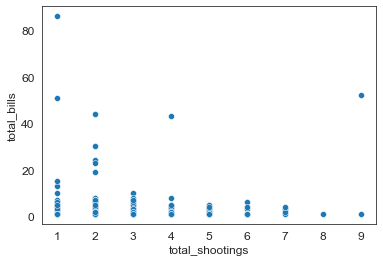

In [363]:
sns.scatterplot(Combined_Counts['total_shootings'], Combined_Counts['total_bills'])
#Creating scatterplot to check if X and Y can be plotted (and scale is within bounds

LinearRegression()
Model R^2 Fit Score = 0.0005693031864947296


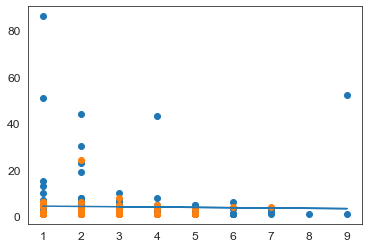

In [364]:
AutoLinearRegression(Combined_Counts[['total_shootings']], Combined_Counts['total_bills'])
#Determining R^2 score as well as looking at fitted line to the scatterplot
#Doesn't seem too promising

******************
*******************
## Conclusion
    - It seems that while there may seem to be a form of correlation when "eyeballing" the month-by-month histogram
     or day-by-day scatterplot and by looking at the means of the statistical analysis, there ultimately is no
      statistically significant correlation between the number of reported police-related shootings and number of legislature bills
       created in California.
    - The R^2 score is meant to determine the strength of fit for the Linear Regression model, with 1 being the strongest and 0
    being the weakest. Due to the R^2 value of 0.0005693031864947296 being < 1, the null cannot be rejected and the alternative hypothesis
    cannot be accepted. There is no significant correlation between these two features.
    - More data, either from more states or more dates may assist in future, more signifiant analyses.

    - Outlier removal could not be conducted due to the Linear Regression function breaking. I was unable to fix this issue
    - Log transformations to "total_shootings" was considered due to the positive skew, however this proved to also break the
    analysis due to the transformation causing a few infinity values (thus the transformation cannot be performed)

    - We previously attempted to perform text analysis on the bills themselves, but this proved fruitless due to the sheer
    amount of processing power and RAM needed to perform the combined webscraping and parsing functions with beautiful soup
    - Perhaps in the future, with the help of optimization of the code and more computing power, this could be done
    - The group did struggle a lot with EDA due to inexperience with Visualizations and Python itself. Unfortunately there wasn't
    much else I could do to alleviate that in time as I received little feedback from groupmates on this until it was too late.
******************
*******************

## Junk Code:
- All of the code that was once used in the process of this analysis, but is no longer needed either due to the csv being overwritten with the new changes or a faster/efficient method in its place
******************
*******************

In [365]:
#Columns were not properly formatted so I had to do this myself

#shooting = shootings_table.reset_index(drop=True) #Resetting index as loop uses it

#index=0 #Index counter
#templist = []
#for row in shootings_table['date']:
#    row= row.replace('-','',)
#    templist.append(int(row))
#    #shootings_table.at[index,'date'] = row. Won't need to do this as we want to keep the original date just in case
#Rewrites the row under the 'Status' column so that the new string is there
#    index += 1
#shootings_table['date_homogenized'] = templist

In [366]:
#NaNs were not removed so I had to do this myself

#bills_table.info()
#Dropping nans due to only 2 of them existing
#shootings_table.dropna(subset=['date'], inplace = True)
#shootings_table.info()

#Creating a outlier removal function
#I usually make this just in case I need it, however this ended up not being used
#def outlier_removal(input):
#    Q1 = input.quantile(.25)
#    Q3 = input.quantile(.75)
#    IQR = Q3 - Q1

#    index = (input > (Q1-1.5*IQR)) & (input < (Q3+1.5*IQR))
#    return np.where(index, input, np.nan)

In [367]:
#Removing outliers for both
#Combined_Counts['total_shootings'] = outlier_removal(Combined_Counts['total_shootings'])
#Combined_Counts['total_bills'] = outlier_removal(Combined_Counts['total_bills'])
